# Prediction of Sales
  - Author: Loveida Lucero

## Project Overview

## Load and Inspect Data

### Imports

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

### Loaded Data

In [2]:
fname = '/content/drive/MyDrive/StudentFolders16wk24wk/CodingDojo/01-Fundamentals/Week02/Data/sales_predictions_2023.csv'
df_sales = pd.read_csv(fname)

In [3]:
# View first 5 rows
df_sales.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [4]:
# View summary info
df_sales.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                7060 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                6113 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


## Data Cleaning


Rows/Colums:

In [5]:
df_sales.shape

(8523, 12)

Datatypes of each variable:

In [6]:
df_sales.dtypes

Item_Identifier               object
Item_Weight                  float64
Item_Fat_Content              object
Item_Visibility              float64
Item_Type                     object
Item_MRP                     float64
Outlet_Identifier             object
Outlet_Establishment_Year      int64
Outlet_Size                   object
Outlet_Location_Type          object
Outlet_Type                   object
Item_Outlet_Sales            float64
dtype: object

### Duplicates

Checking for duplicated data:

In [7]:
df_sales.duplicated().sum()

0

- No duplicates found.

### Missing Values

Identify missing values:

In [8]:
df_sales.isna().sum()

Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

- Item_Weight has 1463 missing values.
- Outlet_Size has 2410 missing values.

Percentages of missing values:

In [9]:
df_sales.isna().sum()/len(df_sales) * 100

Item_Identifier               0.000000
Item_Weight                  17.165317
Item_Fat_Content              0.000000
Item_Visibility               0.000000
Item_Type                     0.000000
Item_MRP                      0.000000
Outlet_Identifier             0.000000
Outlet_Establishment_Year     0.000000
Outlet_Size                  28.276428
Outlet_Location_Type          0.000000
Outlet_Type                   0.000000
Item_Outlet_Sales             0.000000
dtype: float64

Address the missing values using a placeholder value:

In [10]:
# Deactivated for part 4 viz
#df_sales['Item_Weight'] = df_sales['Item_Weight'].fillna(value = -1)
#df_sales['Item_Weight'].value_counts()

In [11]:
df_sales['Outlet_Size'] = df_sales['Outlet_Size'].fillna(value = 'MISSING')
df_sales['Outlet_Size'].value_counts()

Medium     2793
MISSING    2410
Small      2388
High        932
Name: Outlet_Size, dtype: int64

Confirm missing values were replaced:

In [12]:
df_sales.isna().sum()

Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                     0
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

## Inconsistencies

Create filters to identify all values per object type:

In [13]:
data_types = df_sales.dtypes
str_cols = data_types[data_types=='object'].index
str_cols

Index(['Item_Identifier', 'Item_Fat_Content', 'Item_Type', 'Outlet_Identifier',
       'Outlet_Size', 'Outlet_Location_Type', 'Outlet_Type'],
      dtype='object')

In [14]:
for col in str_cols:
    print(f'- {col}:')
    print(df_sales[col].value_counts(dropna=False))
    print("\n")

- Item_Identifier:
FDW13    10
FDG33    10
NCY18     9
FDD38     9
DRE49     9
         ..
FDY43     1
FDQ60     1
FDO33     1
DRF48     1
FDC23     1
Name: Item_Identifier, Length: 1559, dtype: int64


- Item_Fat_Content:
Low Fat    5089
Regular    2889
LF          316
reg         117
low fat     112
Name: Item_Fat_Content, dtype: int64


- Item_Type:
Fruits and Vegetables    1232
Snack Foods              1200
Household                 910
Frozen Foods              856
Dairy                     682
Canned                    649
Baking Goods              648
Health and Hygiene        520
Soft Drinks               445
Meat                      425
Breads                    251
Hard Drinks               214
Others                    169
Starchy Foods             148
Breakfast                 110
Seafood                    64
Name: Item_Type, dtype: int64


- Outlet_Identifier:
OUT027    935
OUT013    932
OUT049    930
OUT046    930
OUT035    930
OUT045    929
OUT018    928
OUT017    926


- There are inconsistnecies with the spelling of the following categories in Item_Fat_Content.
  - **LF** should be **Low Fat**
  - **reg** should be **Regular**
  - **low fat** should be **Low Fat**


Fix all inconsistent categories:

In [15]:
df_sales['Item_Fat_Content'] = df_sales['Item_Fat_Content'].replace({'LF':'Low Fat','reg':'Regular','low fat':'Low Fat'})

Confirm category inconsistencies were addressed:

In [16]:
df_sales['Item_Fat_Content'].value_counts()

Low Fat    5517
Regular    3006
Name: Item_Fat_Content, dtype: int64

### Summary statistics of each (min, max, mean)for numerical columns:

In [17]:
stats = df_sales.describe()
stats.loc[['mean','min','max']]

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
mean,12.857645,0.066132,140.992782,1997.831867,2181.288914
min,4.555000,0.000000,31.290000,1985.000000,33.290000
max,21.350000,0.328391,266.888400,2009.000000,13086.964800


## Clean Data

In [18]:
df_sales.dtypes
df_sales.head(10)

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.300,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.920,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.500,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.200,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,MISSING,Tier 3,Grocery Store,732.3800
4,NCD19,8.930,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052
5,FDP36,10.395,Regular,0.000000,Baking Goods,51.4008,OUT018,2009,Medium,Tier 3,Supermarket Type2,556.6088
6,FDO10,13.650,Regular,0.012741,Snack Foods,57.6588,OUT013,1987,High,Tier 3,Supermarket Type1,343.5528
7,FDP10,NaN,Low Fat,0.127470,Snack Foods,107.7622,OUT027,1985,Medium,Tier 3,Supermarket Type3,4022.7636
8,FDH17,16.200,Regular,0.016687,Frozen Foods,96.9726,OUT045,2002,MISSING,Tier 2,Supermarket Type1,1076.5986
9,FDU28,19.200,Regular,0.094450,Frozen Foods,187.8214,OUT017,2007,MISSING,Tier 2,Supermarket Type1,4710.5350


## Exploratory Data Analasis

###Histogram to view distribution of numerical features:

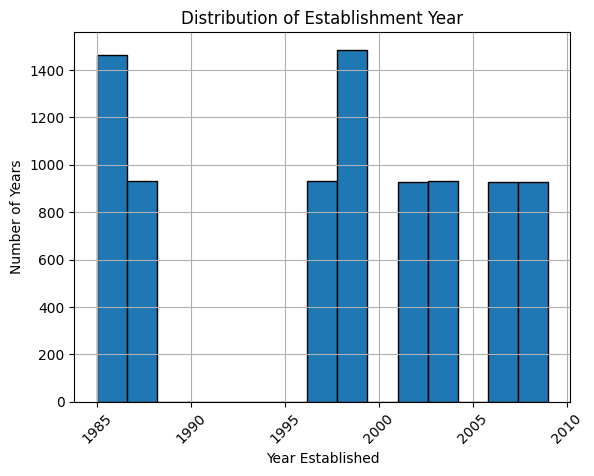

In [19]:
# graph Outlet_Establishment_Year
ax = df_sales['Outlet_Establishment_Year'].hist(bins = 'auto', edgecolor = 'black')
ax.tick_params(axis='x', rotation = 45)
ax.ticklabel_format(style='plain')

# set labels
ax.set_title('Distribution of Establishment Year')
ax.set_xlabel('Year Established')
ax.set_ylabel('Number of Years');

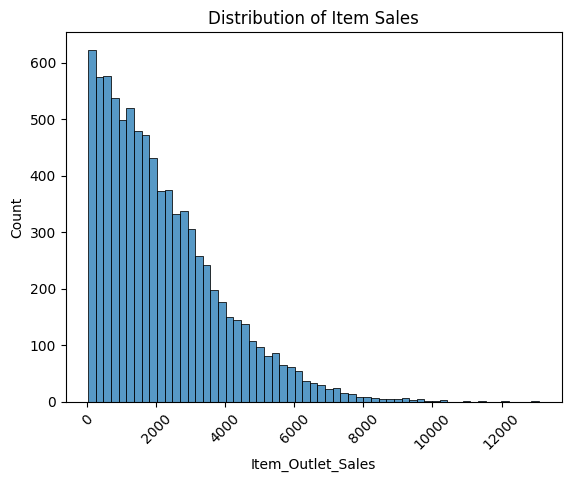

In [20]:
# graph Item_Outlet_Sales
ax = sns.histplot(data=df_sales,
                  x='Item_Outlet_Sales')

#Custumize
ax.ticklabel_format(style='plain');
ax.tick_params(axis='x', rotation = 45);
ax.set_title('Distribution of Item Sales');

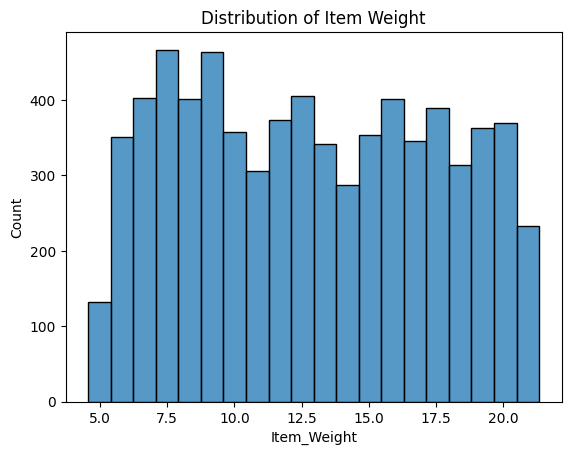

In [21]:
# graph Item_Weight
ax = sns.histplot(data=df_sales,
                  x='Item_Weight')

#Custumize
ax.ticklabel_format(style='plain');
ax.tick_params(axis='x');
ax.set_title('Distribution of Item Weight');

###Boxplots to view statistical data of numerical features:

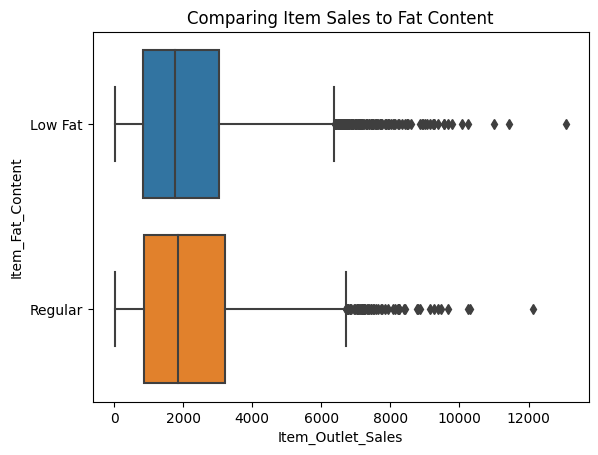

In [22]:
#graph item fat contentand item outlet sales
ax = sns.boxplot(data=df_sales, y='Item_Fat_Content', x="Item_Outlet_Sales")

# set title
ax.set_title("Comparing Item Sales to Fat Content");

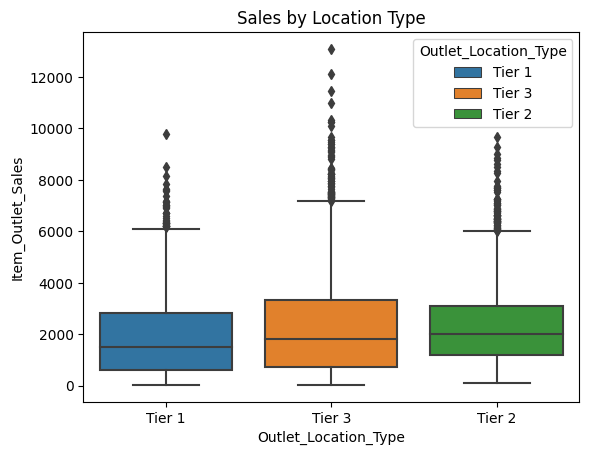

In [23]:
# graph outlet sales and outlet location type
ax = sns.boxplot(data=df_sales, x='Outlet_Location_Type',
                y='Item_Outlet_Sales',
                hue='Outlet_Location_Type',
                dodge=False)

# set title
ax.set_title('Sales by Location Type');


###Countplots to view frequency of each class of categorical features:

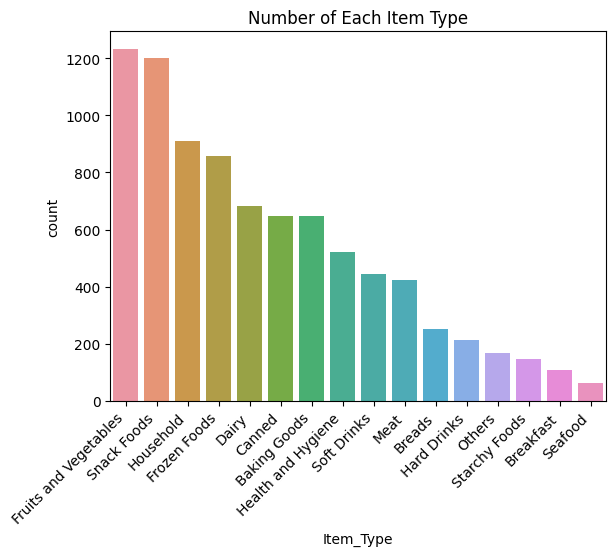

In [24]:
#set value caounts for Item Type
val_counts = df_sales['Item_Type'].value_counts()

#graph Item type
ax = sns.countplot(data=df_sales, x="Item_Type",
                   order=val_counts.index)
#customize
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')
ax.set_title('Number of Each Item Type');

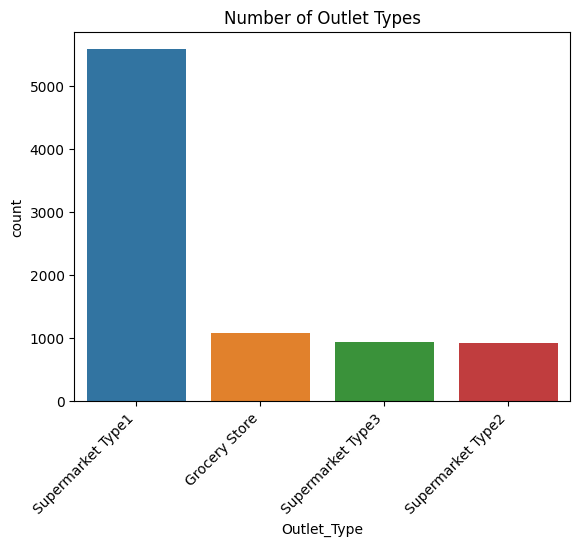

In [25]:
#set value counts for Outlet Type
tp_val_counts = df_sales['Outlet_Type'].value_counts()

#graph Outlet type
ax = sns.countplot(data=df_sales, x="Outlet_Type",
                   order=tp_val_counts.index)
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')
ax.set_title('Number of Outlet Types');

###Heatmap to view correlations between features:

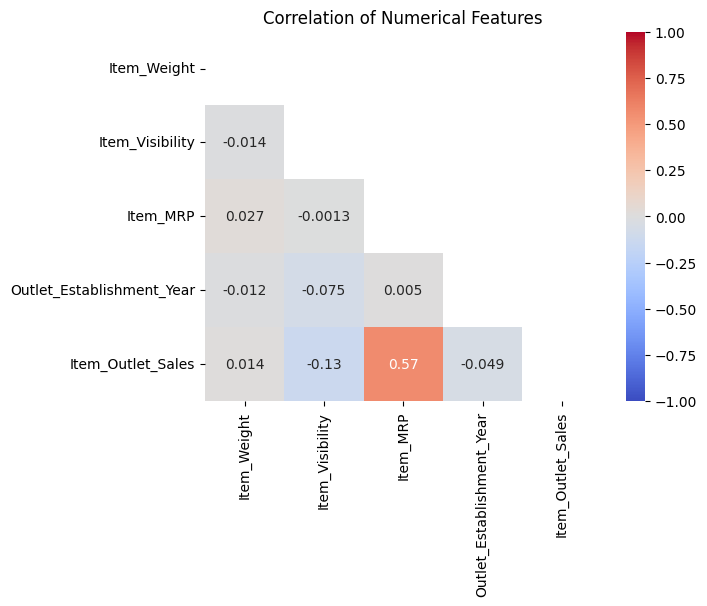

In [26]:
#set corr for item visibility and sales
corr = df_sales.corr(numeric_only = True)

#block upper triangle(mirror)image
mask = np.triu(np.ones_like(corr))

#graph features
ax = sns.heatmap(corr,
                 annot=True,
                 cmap='coolwarm',
                 vmin=-1,
                 vmax=1,
                 mask=mask)

# set label
ax.set_title('Correlation of Numerical Features');

## Feature Inspection

Establishing null values

In [27]:
# Replace placeholder values with null values
df_sales['Outlet_Size']= df_sales['Outlet_Size'].replace({'MISSING': None})
#Deactivated code previously used to fill nullin Item_Weight
df_sales.isna().sum()

Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

In [28]:
## Display the descriptive statistics for the numeric columns
df_sales.describe(include='number')

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
count,7060.000000,8523.000000,8523.000000,8523.000000,8523.000000
mean,12.857645,0.066132,140.992782,1997.831867,2181.288914
std,4.643456,0.051598,62.275067,8.371760,1706.499616
min,4.555000,0.000000,31.290000,1985.000000,33.290000
25%,8.773750,0.026989,93.826500,1987.000000,834.247400
50%,12.600000,0.053931,143.012800,1999.000000,1794.331000
75%,16.850000,0.094585,185.643700,2004.000000,3101.296400
max,21.350000,0.328391,266.888400,2009.000000,13086.964800


In [29]:
## Display the descriptive statistics for the numeric columns
df_sales.describe(include='object')

,Item_Identifier,Item_Fat_Content,Item_Type,Outlet_Identifier,Outlet_Size,Outlet_Location_Type,Outlet_Type
count,8523,8523,8523,8523,6113,8523,8523
unique,1559,2,16,10,3,3,4
top,FDW13,Low Fat,Fruits and Vegetables,OUT027,Medium,Tier 3,Supermarket Type1
freq,10,5517,1232,935,2793,3350,5577


Univariate Functions:

In [30]:
def explore_categorical(df, x, fillna = True, placeholder = 'MISSING',
                        figsize = (6,4), order = None):

  # Make a copy of the dataframe and fillna
  temp_df = df_sales.copy()
  # Before filling nulls, save null value counts and percent for printing
  null_count = temp_df[x].isna().sum()
  null_perc = null_count/len(temp_df)* 100
  # fillna with placeholder
  if fillna == True:
    temp_df[x] = temp_df[x].fillna(placeholder)
  # Create figure with desired figsize
  fig, ax = plt.subplots(figsize=figsize)
  # Plotting a count plot
  sns.countplot(data=temp_df, x=x, ax=ax, order=order)
  # Rotate Tick Labels for long names
  ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')
  # Add a title with the feature name included
  ax.set_title(f"Column: {x}", fontweight='bold')

  # Fix layout and show plot (before print statements)
  fig.tight_layout()
  plt.show()

  # Print null value info
  print(f"- NaN's Found: {null_count} ({round(null_perc,2)}%)")
  # Print cardinality info
  nunique = temp_df[x].nunique()
  print(f"- Unique Values: {nunique}")

  # First find value counts of feature
  val_counts = temp_df[x].value_counts(dropna=False)
  # Define the most common value
  most_common_val = val_counts.index[0]
  # Define the frequency of the most common value
  freq = val_counts.values[0]
  # Calculate the percentage of the most common value
  perc_most_common = freq / len(temp_df) * 100

  # Print the results
  print(f"- Most common value: '{most_common_val}' occurs {freq} times ({round(perc_most_common,2)}%)")
  # print message if quasi-constant or constant (most common val more than 98% of data)
  if perc_most_common > 98:
    print(f"\n- [!] Warning: '{x}' is a constant or quasi-constant feature and should be dropped.")
  else:
    print("- Not constant or quasi-constant.")
  return fig, ax

In [31]:
def explore_numeric(df, x, figsize=(6,5) ):

  ## Save null value counts and percent for printing
  null_count = df[x].isna().sum()
  null_perc = null_count/len(df)* 100


  ## Making our figure with gridspec for subplots
  gridspec = {'height_ratios':[0.7,0.3]}
  fig, axes = plt.subplots(nrows=2, figsize=figsize,
                           sharex=True, gridspec_kw=gridspec)
  # Histogram on Top
  sns.histplot(data=df, x=x, ax=axes[0])

  # Boxplot on Bottom
  sns.boxplot(data=df, x=x, ax=axes[1])

  ## Adding a title
  axes[0].set_title(f"Column: {x}", fontweight='bold')

  ## Adjusting subplots to best fill Figure
  fig.tight_layout()

  # Ensure plot is shown before message
  plt.show()


  # Print null value info
  print(f"- NaN's Found: {null_count} ({round(null_perc,2)}%)")
  # Print cardinality info
  nunique = df[x].nunique()
  print(f"- Unique Values: {nunique}")


  # Get the most most common value, its count as # and as %
  most_common_val_count = df[x].value_counts(dropna=False).head(1)
  most_common_val = most_common_val_count.index[0]
  freq = most_common_val_count.values[0]
  perc_most_common = freq / len(df) * 100

  print(f"- Most common value: '{most_common_val}' occurs {freq} times ({round(perc_most_common,2)}%)")

  # print message if quasi-constant or constant (most common val more than 98% of data)
  if perc_most_common > 98:
    print(f"\n- [!] Warning: '{x}' is a constant or quasi-constant feature and should be dropped.")
  else:
    print("- Not constant or quasi-constant.")
  return fig, axes

Multivariate Function:

In [32]:
def plot_categorical_vs_target(df_sales, x, y='Item_Outlet_Sales',figsize=(6,4),
                            fillna = True, placeholder = 'MISSING',
                            order = None):

  # Make a copy of the dataframe and fillna
  temp_df = df_sales.copy()
  # fillna with placeholder
  if fillna == True:
    temp_df[x] = temp_df[x].fillna(placeholder)

  # or drop nulls prevent unwanted 'nan' group in stripplot
  else:
    temp_df = temp_df.dropna(subset=[x])
  # Create the figure and subplots
  fig, ax = plt.subplots(figsize=figsize)

    # Barplot
  sns.barplot(data=temp_df, x=x, y=y, ax=ax, order=order, alpha=0.6,
              linewidth=1, edgecolor='black', errorbar=None)

  # Boxplot
  sns.stripplot(data=temp_df, x=x, y=y, hue=x, ax=ax,
                order=order, hue_order=order, legend=False,
                edgecolor='white', linewidth=0.5,
                size=3,zorder=0)
  # Rotate xlabels
  ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')

  # Add a title
  ax.set_title(f"{x} vs. {y}", fontweight='bold')
  fig.tight_layout()
  return fig, ax

In [33]:
def plot_numeric_vs_target(df_sales, x, y='Item_Outlet_Sales',
                           figsize=(6,4)):

  # Calculate the correlation
  corr = df_sales[[x,y]].corr().round(2)
  r = corr.loc[x,y]

  # Plot the data
  fig, ax = plt.subplots(figsize=figsize)
  scatter_kws={'ec':'white','lw':1,'alpha':0.8}
  sns.regplot(data=df_sales, x=x, y=y, ax=ax, scatter_kws=scatter_kws)

  ## Add the title with the correlation
  ax.set_title(f"{x} vs. {y} (r = {r})", fontweight='bold')

  # Make sure the plot is shown before the print statement
  plt.show()

  return fig, ax

###Item_Identifier
- Product ID

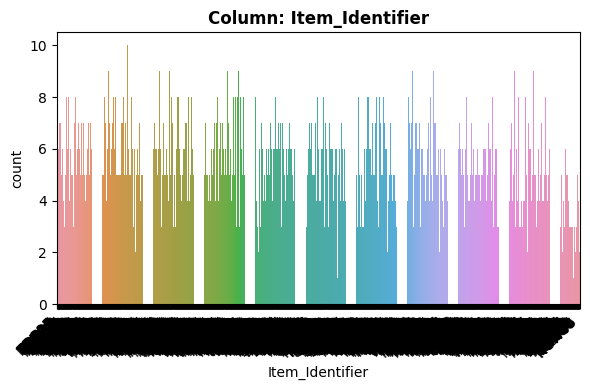

- NaN's Found: 0 (0.0%)
- Unique Values: 1559
- Most common value: 'FDW13' occurs 10 times (0.12%)
- Not constant or quasi-constant.


In [34]:
explore_categorical(df_sales, 'Item_Identifier');

- What type of feature is it? (Categorical (nominal), ordinal, numeric)
  - Nominal
- How many null values? What percentage? What would you do with the null values (drop the rows? drop the column? impute? If impute, with what?)
  - 0 null values
  - No need to impute
- Is the feature constant or quasi-constant?
  - No
- What is the cardinality? Is it high (>10)?
  - High (1,559)
- Would we know this feature before the target is determined?
  - Yes
- Is there a business case/understanding reason to exclude based on our business case?
  - This feature should be dropped due to high amount of unique values

  ---

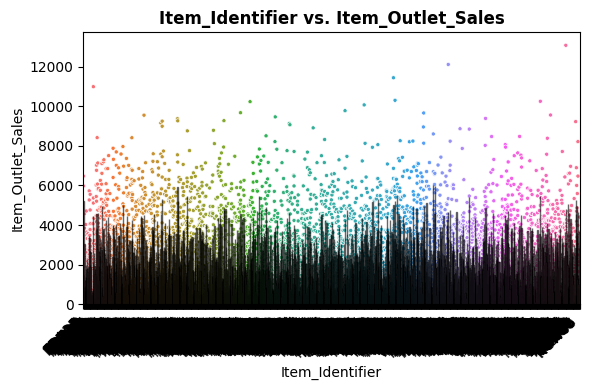

In [35]:
plot_categorical_vs_target(df_sales, x ='Item_Identifier');

- Based on your business understanding, would you expect this feature to be a predictor of the target?
  - No
- Does this feature appear to be a predictor of the target?
  - No

###Item_Weight
- Weight of product

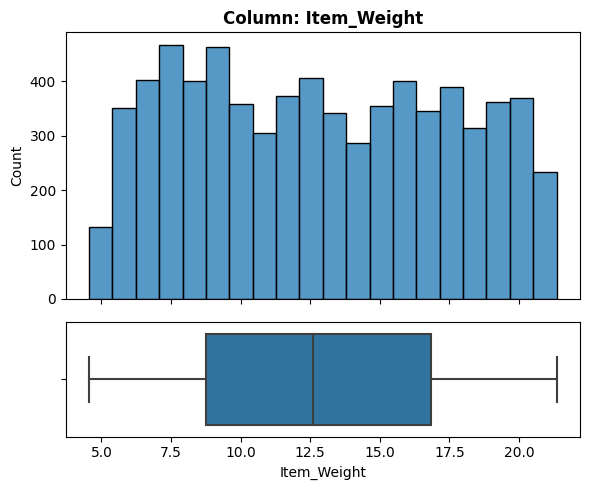

- NaN's Found: 1463 (17.17%)
- Unique Values: 415
- Most common value: 'nan' occurs 1463 times (17.17%)
- Not constant or quasi-constant.


In [36]:
explore_numeric(df_sales, x= 'Item_Weight');

- What type of feature is it? (Categorical (nominal), ordinal, numeric)
  - Numeric
- How many null values? What percentage? What would you do with the null values (drop the rows? drop the column? impute? If impute, with what?)
  - 1,463 (17.17%) null values
  - There is not enough null values to drop the column
  -  Impute with median
- Is the feature constant or quasi-constant?
  - No
- What is the cardinality? Is it high (>10)?
  - N/A (numeric)
- Would we know this feature before the target is determined?
  - Yes
- Is there a business case/understanding reason to exclude based on our business case?
  - No

  ---

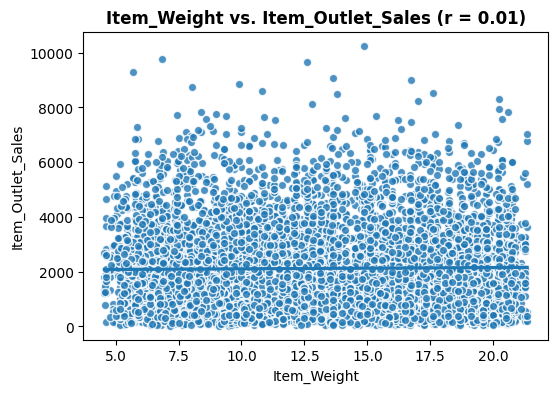

In [38]:
plot_numeric_vs_target(df_sales, x='Item_Weight');

- Based on your business understanding, would you expect this feature to be a predictor of the target?
  - No
- Does this feature appear to be a predictor of the target?
  - No

###Item_Fat_Content
- Whether the product is low-fat or regular

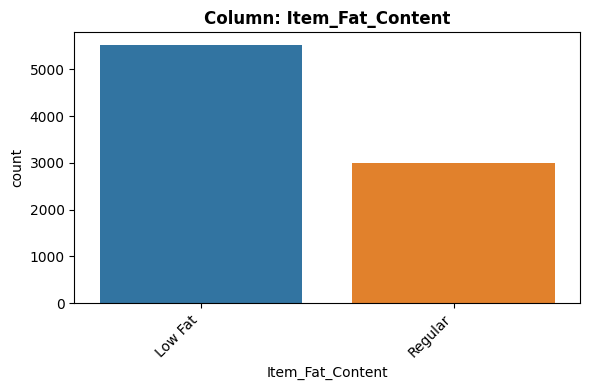

- NaN's Found: 0 (0.0%)
- Unique Values: 2
- Most common value: 'Low Fat' occurs 5517 times (64.73%)
- Not constant or quasi-constant.


In [40]:
explore_categorical(df_sales, 'Item_Fat_Content');

- What type of feature is it? (Categorical (nominal), ordinal, numeric)
  - Nominal
- How many null values? What percentage? What would you do with the null values (drop the rows? drop the column? impute? If impute, with what?)
  - 0 null values
- Is the feature constant or quasi-constant?
  - Not constant or quai-constant
- What is the cardinality? Is it high (>10)?
  - Low(2)
- Would we know this feature before the target is determined?
  - Yes
- Is there a business case/understanding reason to exclude based on our business case?
  - No

  ---

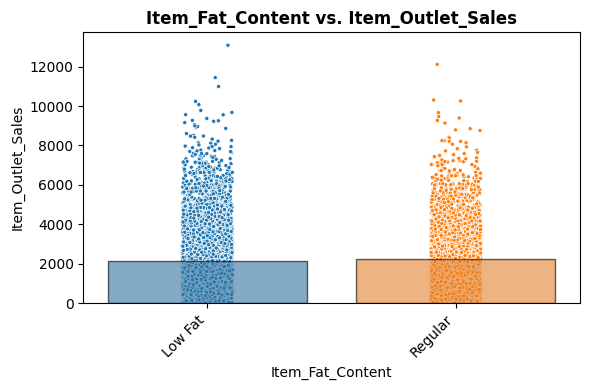

In [41]:
plot_categorical_vs_target(df_sales, x='Item_Fat_Content');

- Based on your business understanding, would you expect this feature to be a predictor of the target?
  - No
- Does this feature appear to be a predictor of the target?
  - No

###Item_Visibility
- The percentage of total display area of all products in a store aloocated to the particular product.

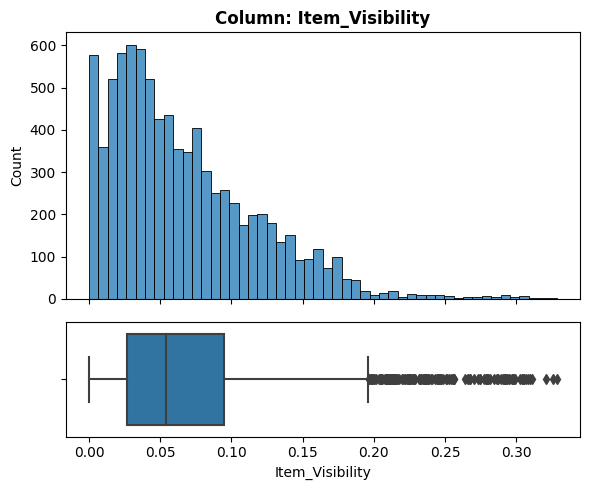

- NaN's Found: 0 (0.0%)
- Unique Values: 7880
- Most common value: '0.0' occurs 526 times (6.17%)
- Not constant or quasi-constant.


In [42]:
explore_numeric(df_sales, x= 'Item_Visibility');

- What type of feature is it? (Categorical (nominal), ordinal, numeric)
  - Numeric
- How many null values? What percentage? What would you do with the null values (drop the rows? drop the column? impute? If impute, with what?)
  - 0 null values
- Is the feature constant or quasi-constant?
  - No
- What is the cardinality? Is it high (>10)?
  - N/A (numeric)
- Would we know this feature before the target is determined?
  - Yes
- Is there a business case/understanding reason to exclude based on our business case?
  - No
  ---

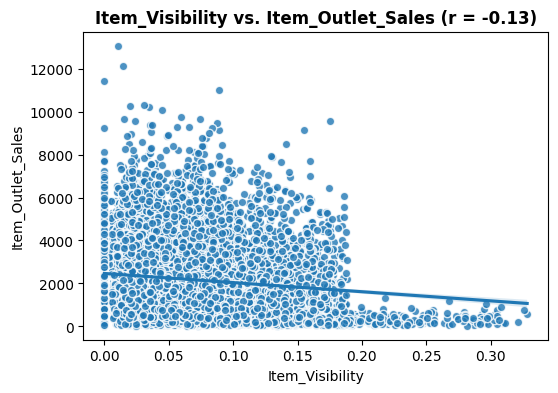

In [43]:
plot_numeric_vs_target(df_sales, x='Item_Visibility');

- Based on your business understanding, would you expect this feature to be a predictor of the target?
  - Yes
- Does this feature appear to be a predictor of the target?
  - No

###Item_Type
- The category to which the product belongs.

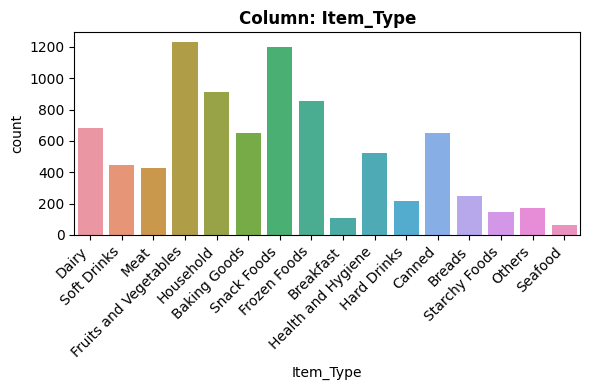

- NaN's Found: 0 (0.0%)
- Unique Values: 16
- Most common value: 'Fruits and Vegetables' occurs 1232 times (14.46%)
- Not constant or quasi-constant.


In [44]:
explore_categorical(df_sales, x='Item_Type');

- What type of feature is it? (Categorical (nominal), ordinal, numeric)
  - Nominal
- How many null values? What percentage? What would you do with the null values (drop the rows? drop the column? impute? If impute, with what?)
  - 0 null values
- Is the feature constant or quasi-constant?
  - Not a constant or quai-constant
- What is the cardinality? Is it high (>10)?
  - High(16)
- Would we know this feature before the target is determined?
  - Yes
- Is there a business case/understanding reason to exclude based on our business case?
  - No

  ---

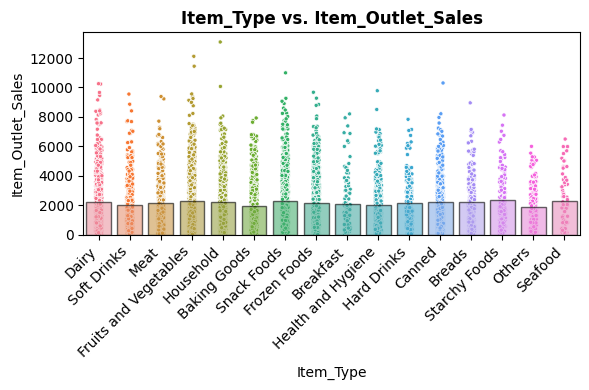

In [45]:
plot_categorical_vs_target(df_sales, x='Item_Type');

- Based on your business understanding, would you expect this feature to be a predictor of the target?
  - No
- Does this feature appear to be a predictor of the target?
  - No

###Item_MRP
- Maximum Retail Price (list price) of the product

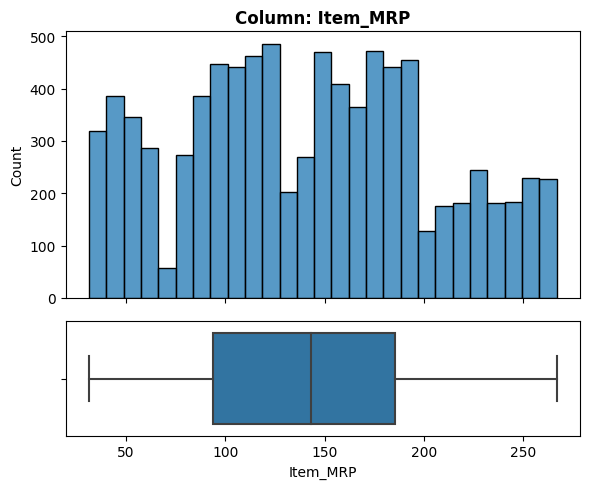

- NaN's Found: 0 (0.0%)
- Unique Values: 5938
- Most common value: '172.0422' occurs 7 times (0.08%)
- Not constant or quasi-constant.


In [46]:
explore_numeric(df_sales, x='Item_MRP');

- What type of feature is it? (Categorical (nominal), ordinal, numeric)
  - Numeric
- How many null values? What percentage? What would you do with the null values (drop the rows? drop the column? impute? If impute, with what?)
  - 0 null values
- Is the feature constant or quasi-constant?
  - Not constant or quai-constant
- What is the cardinality? Is it high (>10)?
  - N/A numeric
- Would we know this feature before the target is determined?
  - No
- Is there a business case/understanding reason to exclude based on our business case?
  - No

---

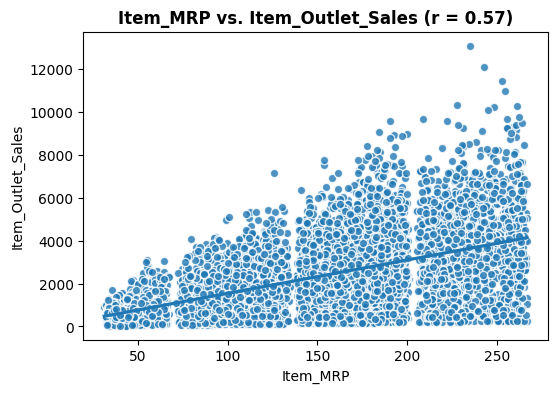

In [47]:
plot_numeric_vs_target(df_sales, x= 'Item_MRP');

- Based on your business understanding, would you expect this feature to be a predictor of the target?
  - Yes
- Does this feature appear to be a predictor of the target?
  - Yes

###Outlet_Identifier
- Store ID

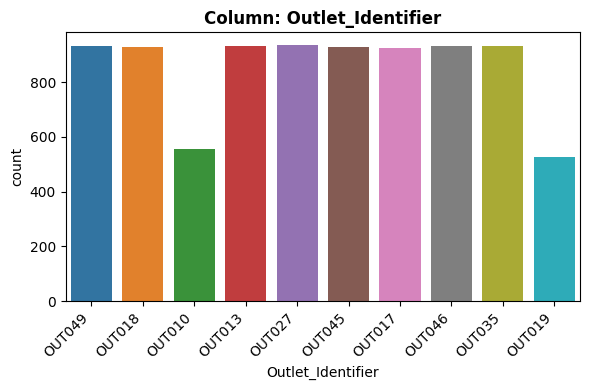

- NaN's Found: 0 (0.0%)
- Unique Values: 10
- Most common value: 'OUT027' occurs 935 times (10.97%)
- Not constant or quasi-constant.


In [48]:
explore_categorical(df_sales, x= 'Outlet_Identifier');

- What type of feature is it? (Categorical (nominal), ordinal, numeric)
  - Nominal
- How many null values? What percentage? What would you do with the null values (drop the rows? drop the column? impute? If impute, with what?)
  - 0 null values
- Is the feature constant or quasi-constant?
  - Not constant or quasi-constant
- What is the cardinality? Is it high (>10)?
  - Low (10)
- Would we know this feature before the target is determined?
  - Yes
- Is there a business case/understanding reason to exclude based on our business case?
  - No

  ---

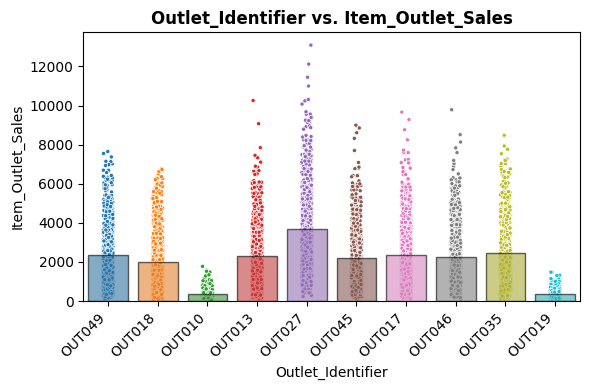

In [49]:
plot_categorical_vs_target(df_sales, x='Outlet_Identifier');

- Based on your business understanding, would you expect this feature to be a predictor of the target?
  - No
- Does this feature appear to be a predictor of the target?
  - No

###Outlet_Establishment_Year
- The year in which store was established

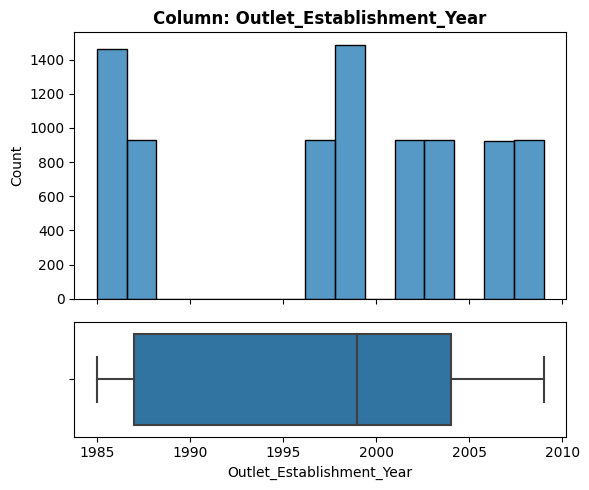

- NaN's Found: 0 (0.0%)
- Unique Values: 9
- Most common value: '1985' occurs 1463 times (17.17%)
- Not constant or quasi-constant.


In [50]:
explore_numeric(df_sales, x= 'Outlet_Establishment_Year');

- What type of feature is it? (Categorical (nominal), ordinal, numeric)
  - Numeric
- How many null values? What percentage? What would you do with the null values (drop the rows? drop the column? impute? If impute, with what?)
  - 0 null values
- Is the feature constant or quasi-constant?
  - Not constant or quasi-constant
- What is the cardinality? Is it high (>10)?
  - N/A (numeric)
- Would we know this feature before the target is determined?
  - Yes
- Is there a business case/understanding reason to exclude based on our business case?
  - No

  ---

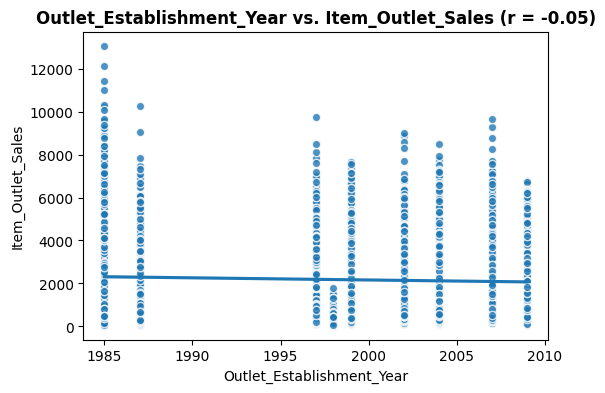

In [51]:
plot_numeric_vs_target(df_sales, x='Outlet_Establishment_Year');

- Based on your business understanding, would you expect this feature to be a predictor of the target?
  - No
- Does this feature appear to be a predictor of the target?
  - No

###Outlet_Size
- The size of the store in terms of ground area covered

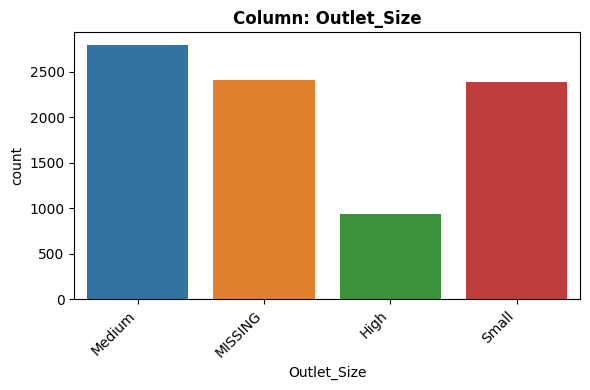

- NaN's Found: 2410 (28.28%)
- Unique Values: 4
- Most common value: 'Medium' occurs 2793 times (32.77%)
- Not constant or quasi-constant.


In [52]:
explore_categorical(df_sales, 'Outlet_Size');

- What type of feature is it? (Categorical (nominal), ordinal, numeric)
  - Ordinal
- How many null values? What percentage? What would you do with the null values (drop the rows? drop the column? impute? If impute, with what?)
  - 2,410 (28.28%) null values
- Is the feature constant or quasi-constant?
  - Not constant or quasi-constant
- What is the cardinality? Is it high (>10)?
  - Low (4)
- Would we know this feature before the target is determined?
  - Yes
- Is there a business case/understanding reason to exclude based on our business case?
  - No

  ---

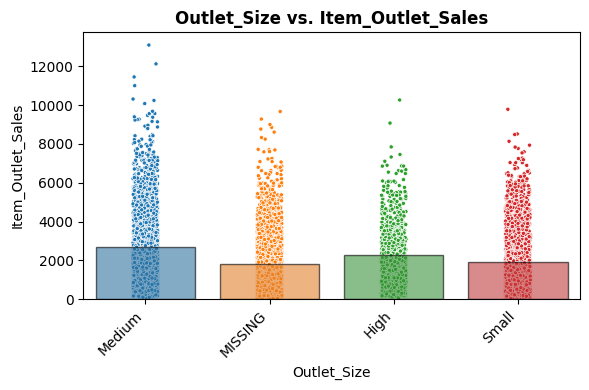

In [53]:
plot_categorical_vs_target(df_sales, x='Outlet_Size');

- Based on your business understanding, would you expect this feature to be a predictor of the target?
  - No
- Does this feature appear to be a predictor of the target?
  - No

###Outlet_Location_Type
- The type of area in which the store is located

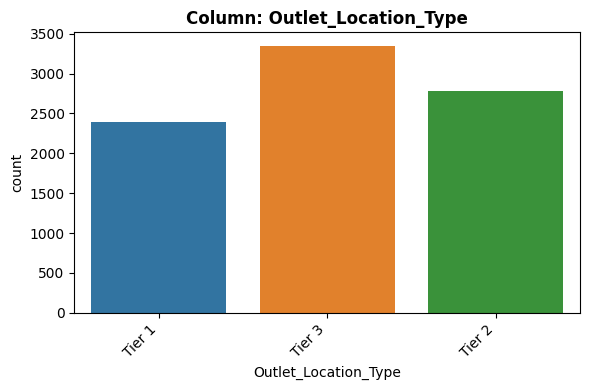

- NaN's Found: 0 (0.0%)
- Unique Values: 3
- Most common value: 'Tier 3' occurs 3350 times (39.31%)
- Not constant or quasi-constant.


In [54]:
explore_categorical(df_sales, 'Outlet_Location_Type');

- What type of feature is it? (Categorical (nominal), ordinal, numeric)
  - Ordinal
- How many null values? What percentage? What would you do with the null values (drop the rows? drop the column? impute? If impute, with what?)
  - 0 null values
- Is the feature constant or quasi-constant?
  - Not constant or quasi-constant
- What is the cardinality? Is it high (>10)?
  - Low (3)
- Would we know this feature before the target is determined?
  - Yes
- Is there a business case/understanding reason to exclude based on our business case?
  - No

  ---

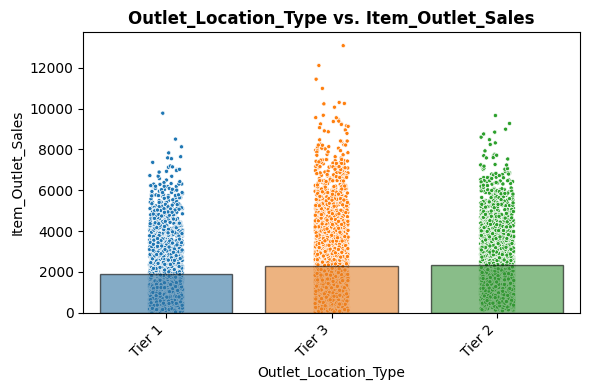

In [55]:
plot_categorical_vs_target(df_sales, x='Outlet_Location_Type');

- Based on your business understanding, would you expect this feature to be a predictor of the target?
  - Yes
- Does this feature appear to be a predictor of the target?
  - No

###Outlet_Type
- Whether the outlet is a grocery store or some sort of supermarket

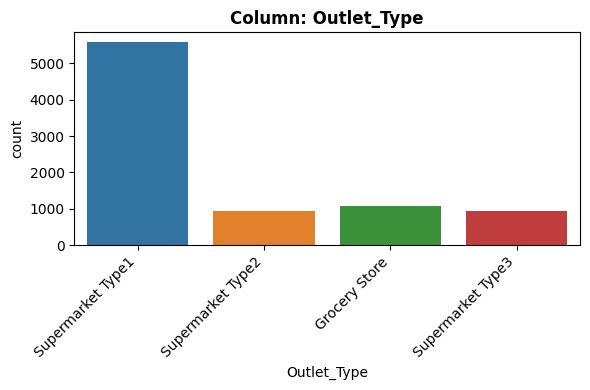

- NaN's Found: 0 (0.0%)
- Unique Values: 4
- Most common value: 'Supermarket Type1' occurs 5577 times (65.43%)
- Not constant or quasi-constant.


In [56]:
explore_categorical(df_sales, 'Outlet_Type');

- What type of feature is it? (Categorical (nominal), ordinal, numeric)
  - Nominal
- How many null values? What percentage? What would you do with the null values (drop the rows? drop the column? impute? If impute, with what?)
  - 0 null values
- Is the feature constant or quasi-constant?
  - Not constant or quasi-constant
- What is the cardinality? Is it high (>10)?
  - Low (4)
- Would we know this feature before the target is determined?
  - Yes
- Is there a business case/understanding reason to exclude based on our business case?
  - No

  ---

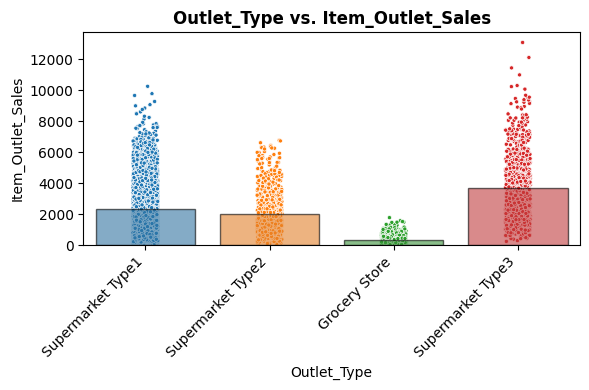

In [57]:
plot_categorical_vs_target(df_sales, x='Outlet_Type');

- Based on your business understanding, would you expect this feature to be a predictor of the target?
  - No
- Does this feature appear to be a predictor of the target?
  - Yes

###Item_Outlet_Sales
- Sales of the product in the particular store. This is the target variable to be predicted.

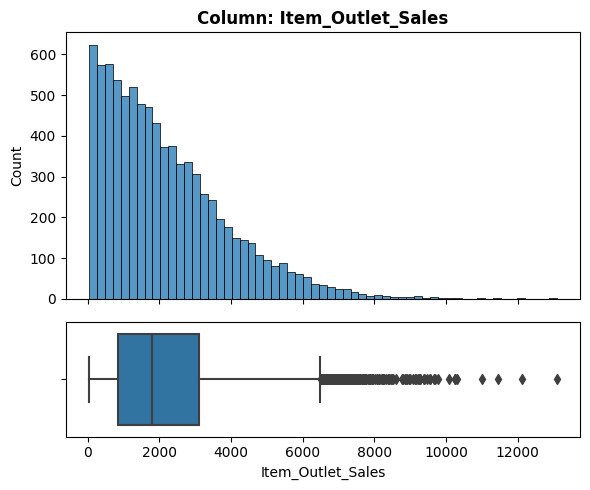

- NaN's Found: 0 (0.0%)
- Unique Values: 3493
- Most common value: '958.752' occurs 17 times (0.2%)
- Not constant or quasi-constant.


In [58]:
explore_numeric(df_sales, x= 'Item_Outlet_Sales');

- What type of feature is it? (Categorical (nominal), ordinal, numeric)
  - Numeric
- How many null values? What percentage? What would you do with the null values (drop the rows? drop the column? impute? If impute, with what?)
  - 0 null values
- Is the feature constant or quasi-constant?
  - Not constant or quasi-constant
- What is the cardinality? Is it high (>10)?
  - N/A (numeric)
- Would we know this feature before the target is determined?
  - N/A (is target)
- Is there a business case/understanding reason to exclude based on our business case?
  - No

  ---